In [56]:
import pandas as pd
import seaborn as sns
from statsmodels.tsa.stattools import adfuller

In [57]:
air_passengers = pd.read_csv("air-passengers.csv")
air_passengers

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


<AxesSubplot:>

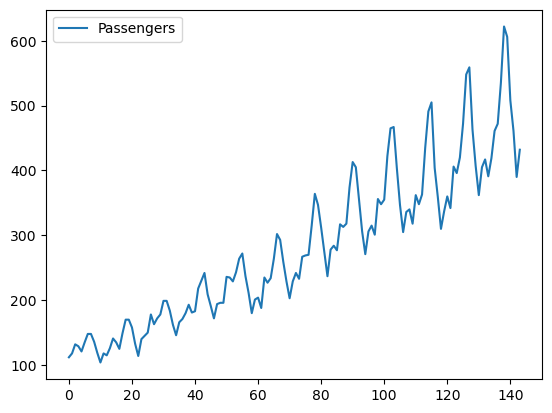

In [58]:
air_passengers.plot()

In [59]:
air_passengers

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [60]:
air_passengers_train = air_passengers.iloc[:-12, 1]
air_passengers_train

0      112
1      118
2      132
3      129
4      121
      ... 
127    559
128    463
129    407
130    362
131    405
Name: Passengers, Length: 132, dtype: int64

In [61]:
air_passengers_test = air_passengers.iloc[-12:, 1]
air_passengers_test

132    417
133    391
134    419
135    461
136    472
137    535
138    622
139    606
140    508
141    461
142    390
143    432
Name: Passengers, dtype: int64

## check stationarity

In [62]:
adfuller(air_passengers_train)

(0.8880265130074999,
 0.9929320626482829,
 13,
 118,
 {'1%': -3.4870216863700767,
  '5%': -2.8863625166643136,
  '10%': -2.580009026141913},
 888.9190559349265)

In [63]:
air_passengers_train_diff = air_passengers_train.diff().diff().dropna() 
air_passengers_train_diff 

2        8.0
3      -17.0
4       -5.0
5       22.0
6       -1.0
       ...  
127    -65.0
128   -107.0
129     40.0
130     11.0
131     88.0
Name: Passengers, Length: 130, dtype: float64

In [64]:
adfuller(air_passengers_train_diff) #เป็น Stationarity แล้ว

(-14.252870967321126,
 1.4707909555895343e-26,
 11,
 118,
 {'1%': -3.4870216863700767,
  '5%': -2.8863625166643136,
  '10%': -2.580009026141913},
 877.6910674606687)

In [65]:
from statsmodels.graphics.tsaplots import plot_acf

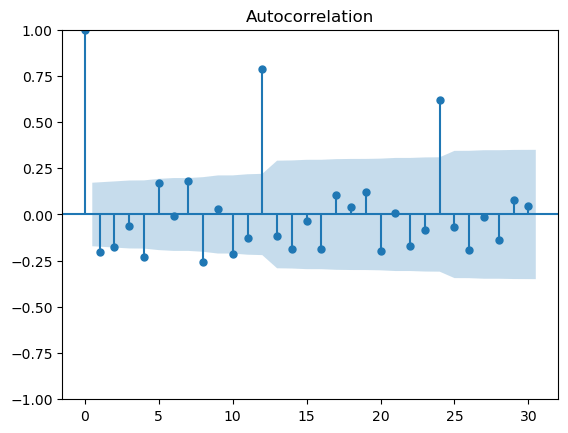

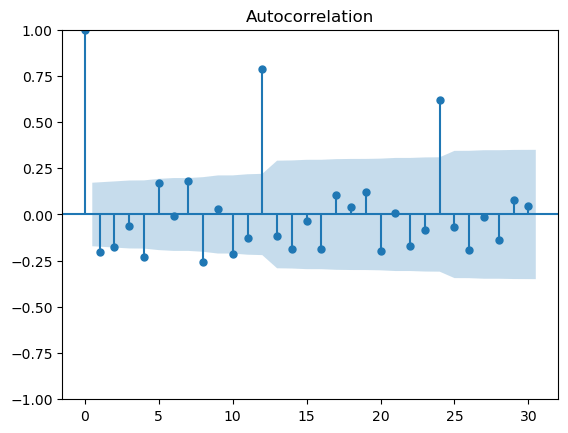

In [66]:
plot_acf(air_passengers_train_diff, lags=30)

In [67]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [68]:
results = []
for p in range(1,3):
    for q in range(1,3):
        for P in range(1,3):
            for Q in range(1,3):
                model = SARIMAX(air_passengers_train, order=(p,1,q), seasonal_order=(P,1,Q,12))
                fitted_model = model.fit()
                results.append([(p,q,P,Q), fitted_model.aic])

C:\Users\PP\anaconda3\envs\CallmeEnv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\PP\anaconda3\envs\CallmeEnv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\PP\anaconda3\envs\CallmeEnv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\PP\anaconda3\envs\CallmeEnv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\PP\anaconda3\envs\CallmeEnv\lib\site-packag

In [69]:
results_df = pd.DataFrame(results, columns=["p,q,P,Q", "AIC"])
results_df.sort_values("AIC")

,"p,q,P,Q",AIC
9,"(2, 1, 1, 2)",892.242361
10,"(2, 1, 2, 1)",893.888003
13,"(2, 2, 1, 2)",895.765768
1,"(1, 1, 1, 2)",896.222496
14,"(2, 2, 2, 1)",896.816766
2,"(1, 1, 2, 1)",896.974974
5,"(1, 2, 1, 2)",898.169007
6,"(1, 2, 2, 1)",898.927665
3,"(1, 1, 2, 2)",899.912408
15,"(2, 2, 2, 2)",899.953397


In [78]:
model = SARIMAX(air_passengers_train, order=(2,1,1), seasonal_order=(1,1,2,12))
fitted_sarima = model.fit()

C:\Users\PP\anaconda3\envs\CallmeEnv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\PP\anaconda3\envs\CallmeEnv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


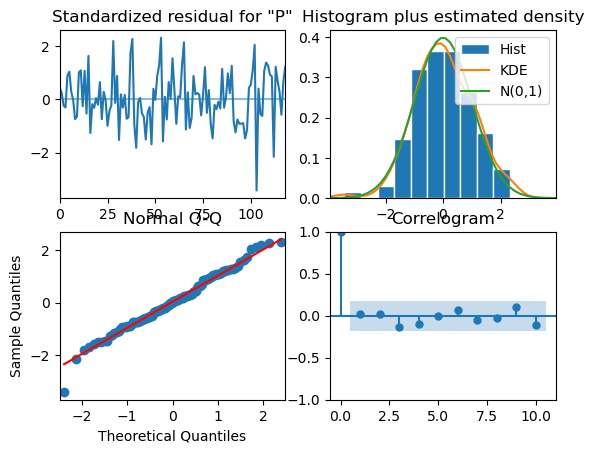

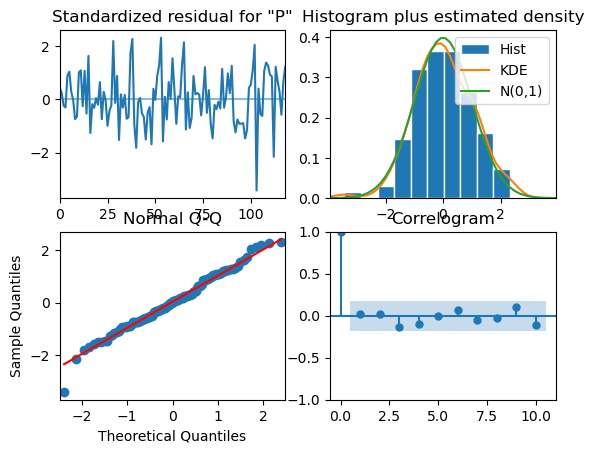

In [79]:
fitted_sarima.plot_diagnostics()